In [5]:
#### DATA LOADING ####
import os

with open('data/hieroglyph.txt','r') as f:
    text = f.read()
    print(text)
    

Hieroglyphic writing dates from c. 3000 BC, and is composed of hundreds of symbols. A hieroglyph can represent a word, a sound, or a silent determinative; and the same symbol can serve different purposes in different contexts. Hieroglyphs were a formal script, used on stone monuments and in tombs, that could be as detailed as individual works of art.



In [6]:
import pandas as pd
df = pd.read_csv('data/news.csv')
df.head()[['publisher','title']]

df['title'] = df['title'].str.lower()
df.head()[['publisher','title']]

/home/satya/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,publisher,title
0,Livemint,fed's charles plosser sees high bar for change...
1,IFA Magazine,us open: stocks fall after fed official hints ...
2,IFA Magazine,"fed risks falling 'behind the curve', charles ..."
3,Moneynews,fed's plosser: nasty weather has curbed job gr...
4,NASDAQ,plosser: fed may have to accelerate tapering pace


In [7]:
import requests
import json

r = requests.get('https://quotes.rest/qod.json')
res = r.json()
print(json.dumps(res,indent=4))

q = res['contents']['quotes'][0]
print(q['quote'],'\n--',q['title'])

{
    "success": {
        "total": 1
    },
    "contents": {
        "quotes": [
            {
                "quote": "You should never view your challenges as a disadvantage. Instead, it's important for you to understand that your experience facing and overcoming adversity is actually one of your biggest advantages.",
                "length": "199",
                "author": "Michelle Obama",
                "tags": [
                    "challenge",
                    "inspire"
                ],
                "category": "inspire",
                "language": "en",
                "date": "2020-03-17",
                "permalink": "https://theysaidso.com/quote/michelle-obama-you-should-never-view-your-challenges-as-a-disadvantage-instead-i",
                "id": "Cui7rno9YsYlmQsPHbg5HgeF",
                "background": "https://theysaidso.com/img/qod/qod-inspire.jpg",
                "title": "Inspiring Quote of the day"
            }
        ]
    },
    "baseurl": "https:

In [8]:
#### WEB SCRAPING ####
import requests

r = requests.get('https://news.ycombinator.com')
print(r.text)

<html op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?YsQPndo3ANpC0QSFFgZB">
        <link rel="shortcut icon" href="favicon.ico">
          <link rel="alternate" type="application/rss+xml" title="RSS" href="rss">
        <title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">
        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img src="y18.gif" width="18" height="18" style="border:1px white solid;"></a></td>
                  <td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b>
              <a href="newest">new</a> | <a href="front">past</a> | <a href="newcommen

In [9]:
import re
pattern = re.compile(r'<.*?>')
print(pattern.sub('',r.text))


        
          
        Hacker News
        
                  Hacker News
              new | past | comments | ask | show | jobs | submit            
                              login
                          
              

              
      1.      NsCDE: Not So Common Desktop Environment (github.com)
        87 points by bilegeek 5 hours ago  | hide | 21&nbsp;comments              
      
                
      2.      Chloroquine has shown apparent efficacy in treatment of Covid-19 (jst.go.jp)
        238 points by robomartin 5 hours ago  | hide | 132&nbsp;comments              
      
                
      3.      Bicycles for the mind have to be see-through [pdf] (akkartik.name)
        130 points by mkeeter 7 hours ago  | hide | 20&nbsp;comments              
      
                
      4.      NPM Is Joining GitHub (github.blog)
        1609 points by mholt 15 hours ago  | hide | 472&nbsp;comments              
      
                
      5.      Text Process

In [11]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(r.text,"html5lib")
print(soup.get_text())


        
          
        Hacker News
        
                  Hacker News
              new | past | comments | ask | show | jobs | submit            
                              login
                          
              

              
      1.      NsCDE: Not So Common Desktop Environment (github.com)
        87 points by bilegeek 5 hours ago  | hide | 21 comments              
      
                
      2.      Chloroquine has shown apparent efficacy in treatment of Covid-19 (jst.go.jp)
        238 points by robomartin 5 hours ago  | hide | 132 comments              
      
                
      3.      Bicycles for the mind have to be see-through [pdf] (akkartik.name)
        130 points by mkeeter 7 hours ago  | hide | 20 comments              
      
                
      4.      NPM Is Joining GitHub (github.blog)
        1609 points by mholt 15 hours ago  | hide | 472 comments              
      
                
      5.      Text Processing in the Shell (ba

In [12]:
summaries = soup.find_all("tr",class_='athing')
print(summaries[0])

<tr class="athing" id="22601342">
      <td align="right" class="title" valign="top"><span class="rank">1.</span></td>      <td class="votelinks" valign="top"><center><a href="vote?id=22601342&amp;how=up&amp;goto=news" id="up_22601342"><div class="votearrow" title="upvote"></div></a></center></td><td class="title"><a class="storylink" href="https://github.com/nscde/nscde">NsCDE: Not So Common Desktop Environment</a><span class="sitebit comhead"> (<a href="from?site=github.com"><span class="sitestr">github.com</span></a>)</span></td></tr>


In [13]:
summaries[0].find('a',class_='storylink').get_text().strip()

'NsCDE: Not So Common Desktop Environment'

In [14]:
titles = []
for i in summaries:
    title = i.find('a',class_='storylink').get_text().strip()
    titles.append(title)

print("total no. of news article: ",len(titles))
print(titles[:3])
    

total no. of news article:  30
['NsCDE: Not So Common Desktop Environment', 'Chloroquine has shown apparent efficacy in treatment of Covid-19', 'Bicycles for the mind have to be see-through [pdf]']


In [15]:
#### NORMALIZATION ####

text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"
print(text)

The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?


In [16]:
text = text.lower()
# text = re.sub(r'[.,:?]',' ',text)
text = re.sub(r'[^a-zA-Z0-9]',' ',text)
print(text)

the first time you see the second renaissance it may look boring  look at it at least twice and definitely watch part 2  it will change your view of the matrix  are the human people the ones who started the war   is ai a bad thing  


In [17]:
#### TOKENIZATION ###
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [18]:
from nltk import word_tokenize
text1 = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"
words = word_tokenize(text1)
print(words)

['The', 'first', 'time', 'you', 'see', 'The', 'Second', 'Renaissance', 'it', 'may', 'look', 'boring', '.', 'Look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', '.', 'It', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', '.', 'Are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', '?', 'Is', 'AI', 'a', 'bad', 'thing', '?']


In [19]:
from nltk import sent_tokenize
sentences = sent_tokenize(text1)
print(sentences)

['The first time you see The Second Renaissance it may look boring.', 'Look at it at least twice and definitely watch part 2.', 'It will change your view of the matrix.', 'Are the human people the ones who started the war ?', 'Is AI a bad thing ?']


In [20]:
#### STOP WORDS REMOVAL ####
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

text = text1
text = re.sub(r'[^a-zA-Z0-9]',' ',text.lower())
tokens = text.split()

In [21]:
tokens_without_stopwords = [w for w in tokens if w not in stop_words]
print('processed text: ',' '.join(tokens_without_stopwords))
print('\nwith tokens: ',tokens_without_stopwords)


processed text:  first time see second renaissance may look boring look least twice definitely watch part 2 change view matrix human people ones started war ai bad thing

with tokens:  ['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'ones', 'started', 'war', 'ai', 'bad', 'thing']


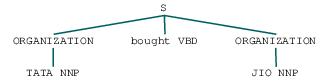

In [4]:
### NAMED ENTITY RECOGNITION ####
from nltk import pos_tag,ne_chunk
from nltk import word_tokenize

ne_chunk(pos_tag(word_tokenize('TATA bought JIO')))

In [24]:
### STEMMING ####
from nltk.stem.porter import PorterStemmer
stemmed = [PorterStemmer().stem(w) for w in tokens_without_stopwords]
print(stemmed)

['first', 'time', 'see', 'second', 'renaiss', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definit', 'watch', 'part', '2', 'chang', 'view', 'matrix', 'human', 'peopl', 'one', 'start', 'war', 'ai', 'bad', 'thing']


In [26]:
#### LEMMATIZATION ####
from nltk.stem.wordnet import WordNetLemmatizer

lemmed = [WordNetLemmatizer().lemmatize(w) for w in tokens_without_stopwords]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'started', 'war', 'ai', 'bad', 'thing']


In [27]:
lemmed_with_verb_POS = [WordNetLemmatizer().lemmatize(w,pos='v') for w in lemmed]
print(lemmed_with_verb_POS)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'start', 'war', 'ai', 'bad', 'thing']
